In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

In [2]:
dataset = pd.read_csv('diabetes.csv')
X = dataset.iloc[:,[0,1,2,3,4,5,6,7]].values
Y = dataset.iloc[:,[8]].values

In [3]:
from sklearn.model_selection import train_test_split
np.random.seed(0)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state = 0)

In [4]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
#Problem 1
from sklearn.linear_model import LogisticRegression 
classifier = LogisticRegression(random_state=0) 
classifier.fit(X_train, Y_train)
Y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(Y_test, Y_pred)
print(cm)

from sklearn import metrics as mt
print("Accuracy:",mt.accuracy_score(Y_test, Y_pred)) 
print("Precision:",mt.precision_score(Y_test, Y_pred)) 
print("Recall:",mt.recall_score(Y_test, Y_pred))

Text(0.5, 257.44, 'Predicted label')

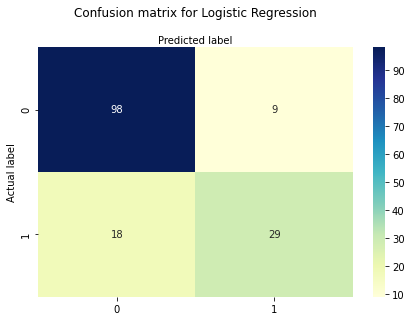

In [6]:
#Output a visual representation of the confusion matirx.
class_names=[0,1] # name  of classes 
fig, ax = plt.subplots() 
tick_marks = np.arange(len(class_names)) 
plt.xticks(tick_marks, class_names) 
plt.yticks(tick_marks, class_names) 
# create heatmap 
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g') 
ax.xaxis.set_label_position("top") 
plt.tight_layout() 
plt.title('Confusion matrix for Logistic Regression', y=1.1) 
plt.ylabel('Actual label') 
plt.xlabel('Predicted label')

In [8]:
#Problem 2
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, Y_train)
Y_pred  =  classifier.predict(X_test)

cm2 = confusion_matrix(Y_test, Y_pred)
print(cm2)
print("Accuracy:",mt.accuracy_score(Y_test, Y_pred)) 
print("Precision:",mt.precision_score(Y_test, Y_pred)) 
print("Recall:",mt.recall_score(Y_test, Y_pred))

[[93 14]
 [18 29]]
Accuracy: 0.7922077922077922
Precision: 0.6744186046511628
Recall: 0.6170212765957447


Text(0.5, 257.44, 'Predicted label')

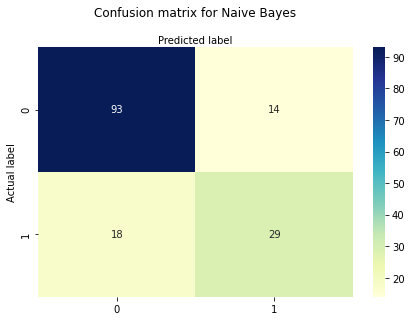

In [9]:
#Output a visual representation of the confusion matirx.
class_names=[0,1] # name  of classes 
fig, ax = plt.subplots() 
tick_marks = np.arange(len(class_names)) 
plt.xticks(tick_marks, class_names) 
plt.yticks(tick_marks, class_names) 
# create heatmap 
sns.heatmap(pd.DataFrame(cm2), annot=True, cmap="YlGnBu" ,fmt='g') 
ax.xaxis.set_label_position("top") 
plt.tight_layout() 
plt.title('Confusion matrix for Naive Bayes', y=1.1) 
plt.ylabel('Actual label') 
plt.xlabel('Predicted label')

In [12]:
#Problem 3
from numpy import mean
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score

# 5 folds
kfold = KFold(n_splits=5, random_state=1, shuffle=True)
model = LogisticRegression(random_state=0)
scoring = {'accuracy' : make_scorer(accuracy_score), 
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score)}

results = cross_validate(model, X, Y, scoring=scoring, cv=kfold, n_jobs=-1)

print("Accuracy:",mean(results['test_accuracy'])) 
print("Precision:",mean(results['test_precision'])) 
print("Recall:",mean(results['test_recall']))

Accuracy: 0.7643493761140819
Precision: 0.7124810149200393
Recall: 0.5455230199569823


In [13]:
#10 folds
kfold = KFold(n_splits=10, random_state=1, shuffle=True)
model = LogisticRegression(random_state=0)
scoring = {'accuracy' : make_scorer(accuracy_score), 
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score)}

results = cross_validate(model, X, Y, scoring=scoring, cv=kfold, n_jobs=-1)

print("Accuracy:",mean(results['test_accuracy'])) 
print("Precision:",mean(results['test_precision'])) 
print("Recall:",mean(results['test_recall']))

Accuracy: 0.7733595352016405
Precision: 0.7302409000490842
Recall: 0.5542750633230393


In [14]:
#Problem 4

# 5 folds
kfold = KFold(n_splits=5, random_state=1, shuffle=True)
model = GaussianNB()
scoring = {'accuracy' : make_scorer(accuracy_score), 
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score)}

resutls = cross_validate(model, X, Y, scoring=scoring, cv=kfold, n_jobs=-1)

print("Accuracy:",mean(results['test_accuracy'])) 
print("Precision:",mean(results['test_precision'])) 
print("Recall:",mean(results['test_recall']))

Accuracy: 0.7733595352016405
Precision: 0.7302409000490842
Recall: 0.5542750633230393


In [15]:
#10 folds
kfold = KFold(n_splits=10, random_state=1, shuffle=True)
model = GaussianNB()
scoring = {'accuracy' : make_scorer(accuracy_score), 
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score)}

results = cross_validate(model, X, Y, scoring=scoring, cv=kfold, n_jobs=-1)

print("Accuracy:",mean(results['test_accuracy'])) 
print("Precision:",mean(results['test_precision'])) 
print("Recall:",mean(results['test_recall']))

Accuracy: 0.7564764183185236
Precision: 0.6652269630530501
Recall: 0.600860189563338
